# Imports

In [56]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
from datetime import datetime
from pandas import concat
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from datetime import date
from numpy import array

# Getting data

In [57]:
data = "seattle-weather.csv"
dataset = read_csv(data)
dataset.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# Exporing what todo with the data

In [58]:
print(dataset.describe())

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


## Arranging our data for training

In [59]:
print("DF Dimensions:", dataset.shape)
dataset.dtypes

DF Dimensions: (1461, 6)


date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

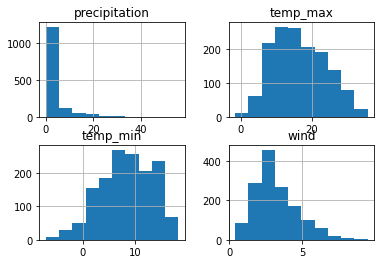

In [60]:
dataset.hist()
pyplot.show()

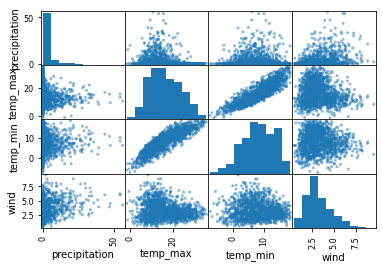

In [61]:

scatter_matrix(dataset)
pyplot.show()

### dealing with date

In [62]:
# Splitting date from the - symbol
dateDF = dataset['date']
dateDF = dateDF.str.split('-',expand=True)
dateDF = dateDF.rename(columns={0:'Year',1:'Month',2:'Day'})
dateDF.head()


,Year,Month,Day
0,2012,01,01
1,2012,01,02
2,2012,01,03
3,2012,01,04
4,2012,01,05


In [63]:
#concat new dates with main features

print(dataset.iloc[:,1:])
weatherDF = concat([dateDF,dataset.iloc[:,1:]],join='outer',axis=1)
weatherDF

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]


,Year,Month,Day,precipitation,temp_max,temp_min,wind,weather
0,2012,01,01,0.0,12.8,5.0,4.7,drizzle
1,2012,01,02,10.9,10.6,2.8,4.5,rain
2,2012,01,03,0.8,11.7,7.2,2.3,rain
3,2012,01,04,20.3,12.2,5.6,4.7,rain
4,2012,01,05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...,...,...
1456,2015,12,27,8.6,4.4,1.7,2.9,rain
1457,2015,12,28,1.5,5.0,1.7,1.3,rain
1458,2015,12,29,0.0,7.2,0.6,2.6,fog
1459,2015,12,30,0.0,5.6,-1.0,3.4,sun


### Setting up Data from X and Y and training

In [64]:
arrayWeather = weatherDF.values
X = arrayWeather[:,1:-1]
y = arrayWeather[:,-1]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Create models To be used

### Choose what model to use

In [65]:
#setting models in a array
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [66]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.821913 (0.035188)
LDA: 0.726857 (0.042386)
KNN: 0.708893 (0.029005)
CART: 0.772318 (0.029358)
NB: 0.846751 (0.029990)
SVM: 0.715746 (0.039086)


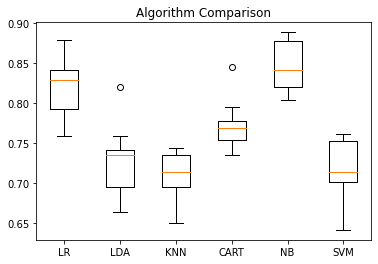

In [67]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Logistic regression and GaussianNB are the best models 

In [68]:



model = GaussianNB()
model.fit(X_train, Y_train)
print(type(X_validation[0]))
predictions = model.predict(X_validation)
print(type(X_validation[0]))

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.825938566552901
[[  2   0   0   0   9]
 [  2   0   0   0  27]
 [  0   0 120   1   7]
 [  0   0   2   4   0]
 [  1   2   0   0 116]]
              precision    recall  f1-score   support

     drizzle       0.40      0.18      0.25        11
         fog       0.00      0.00      0.00        29
        rain       0.98      0.94      0.96       128
        snow       0.80      0.67      0.73         6
         sun       0.73      0.97      0.83       119

    accuracy                           0.83       293
   macro avg       0.58      0.55      0.55       293
weighted avg       0.76      0.83      0.78       293



In [69]:
from numpy import array
inputData = array([['9','4',10.9,10.6,2.8,4.5]],dtype=float)#.reshape(-1,1)
modelTest = GaussianNB()
modelTest.fit(X_train, Y_train)
predictionsTest = modelTest.predict(inputData)
print('The predicted value from the model is:',predictionsTest[0])
# Evaluate predictions
print('With an accuracy of %s percent.'%(accuracy_score(Y_validation, predictions)*100))


The predicted value from the model is: rain
With an accuracy of 82.5938566552901 percent.


# Creating a Interactive module for testing the model

In [80]:

def getInputs(useSysDate = True):
    if useSysDate == True:  
        curDay = date.today()
        month = curDay.month
        day = curDay.day
    if useSysDate == False or (month == '' or day == ''):
        month = input('Enter the current month in numeric form(e.g. 09 = september):')
        day = input('Enter the current day of the month:')
        while len(month) != 2:
            #needs to be in format of '09' or '12'
            month = input('Enter the current month in numeric form(e.g. 09 = september):')

        while len(day) != 2:
            #needs to be in format of '09' or '30'
            day = input('Enter the current day of the month:')

    #------- precipitation --------
    precipInput = input('Enter the precipitation')
    while float(precipInput) < 0.00:
        precipInput = input('Enter the precipitation')

    #-------- minTemp --------
    minTempInput = input('Enter the minimum temp')
    while minTempInput == '':
        minTempInput = input('Enter the minimum temp')

    #-------- minTemp --------
    maxTempInput = input('Enter the maximum temp')
    while maxTempInput == '' or maxTempInput < minTempInput:
        maxTempInput = input('Enter the maximum temp')

    #-------- wind ---------
    windInput = input('Enter the wind')
    while windInput == '':
        windInput = input('Enter the wind')
    
    return month,day,precipInput,minTempInput,maxTempInput,windInput

def predictCurWeather(inputList = [],askInput = True):
    if askInput == True:
        inputParams = getInputs()
    else:
        if len(inputList) != 7:
            inputParams = getInputs()
        else:
            inputParams = inputList

    data = "seattle-weather.csv"
    dataset = read_csv(data)
    dateDF = dataset['date']
    dateDF = dateDF.str.split('-',expand=True)
    dateDF = dateDF.rename(columns={0:'Year',1:'Month',2:'Day'})
    weatherDF = concat([dateDF,dataset.iloc[:,1:]],join='outer',axis=1)
    arrayWeather = weatherDF.values
    X = arrayWeather[:,1:-1]
    y = arrayWeather[:,-1]

    X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


    model = GaussianNB()
    model.fit(X_train, Y_train)
    predictionsTest = model.predict(array([inputParams],dtype = float))
    print('The predicted value from the model is:',predictionsTest[0])
    # Evaluate predictions
    print('With an accuracy of %s percent.'%(accuracy_score(Y_validation, predictions)*100))
    


    


predictCurWeather()


The predicted value from the model is: sun
With an accuracy of 82.5938566552901 percent.
